In [1]:
import os
import datetime as dt

import requests
import pandas as pd

In [6]:
FILENAME = ('titanic.csv')

In [2]:
def download_titanic_dataset():
    url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with open(FILENAME, 'w', encoding='utf-8') as f:
        for chunk in response.iter_lines():
            f.write('{}\\n'.format(chunk.decode('utf-8')))

In [12]:
def pivot_dataset():
    titanic_df = pd.read_csv(FILENAME)
    pvt = titanic_df.pivot_table(
        index=['Sex'], columns=['Pclass'], values='Name', aggfunc='count'
    )
    df = pvt.reset_index()
    df.to_csv(os.path.join('titanic_pivot_01.csv'))

In [7]:
download_titanic_dataset()

In [13]:
pivot_dataset()

In [18]:
with open('titanic.csv' , 'r') as f:
    titanic_df = pd.read_csv(f)

In [19]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


<AxesSubplot:>

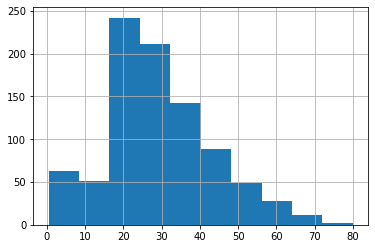

In [26]:
titanic_df.Age.hist()

In [21]:
pvt = titanic_df.pivot_table(
index=['Sex'], columns=['Pclass'], values='Name', aggfunc='count')
df = pvt.reset_index()

In [22]:
df

Pclass,Sex,1,2,3
0,female,94,76,144
1,male,122,108,343


In [ ]:
import os
import datetime as dt

import requests
import pandas as pd
from airflow.models import DAG
from airflow.operators.python_operator import PythonOperator

args = {
    'owner': 'airflow',
    'start_date': dt.datetime(2020, 2, 11),
    'retries': 1,
    'retry_delay': dt.timedelta(minutes=1),
    'depends_on_past': False,
}

FILENAME = os.path.join(os.path.expanduser('~'), 'titanic.csv')

def download_titanic_dataset():
    url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with open(FILENAME, 'w', encoding='utf-8') as f:
        for chunk in response.iter_lines():
            f.write('{}\\n'.format(chunk.decode('utf-8')))

def pivot_dataset():
    titanic_df = pd.read_csv(FILENAME)
    pvt = titanic_df.pivot_table(
        index=['Sex'], columns=['Pclass'], values='Name', aggfunc='count'
    )
    df = pvt.reset_index()
    df.to_csv(os.path.join(os.path.expanduser('~'), 'titanic_pivot.csv'))

with DAG(dag_id='titanic_pivot', default_args=args, schedule_interval=None) as dag:
    create_titanic_dataset = PythonOperator(
        task_id='download_titanic_dataset',
        python_callable=download_titanic_dataset,
        dag=dag
    )
    pivot_titanic_dataset = PythonOperator(
        task_id='pivot_dataset',
        python_callable=pivot_dataset,
        dag=dag
    )
    create_titanic_dataset >> pivot_titanic_dataset

In [24]:
465*0.34 + 717*0.09 + 66

288.63